# Exploratory Data Analysis: Dress Codes in USA High Schools
For this assignment, I will be exploring two datasets related to dress codes in schools. 
The data is accessible on github.com/eizent/assignment3 and originates from The Pudding at https://data.world/the-pudding/dress-codes.

In [1]:
import pandas as pd

In [2]:
pd.options.display.max_rows = 200

First, I will import the first csv file and create a dataframe. Then, I inspect the data set to see the format. 

In [3]:
dressban_df = pd.read_csv('data/banned_items.csv', delimiter=",", encoding = 'utf-8')

In [4]:
dressban_df.sample(10)

,index,schoolName,state,item,type,prohibited
14327,14327,CLEAR BROOK H S,TX,safe/safety,rationale,NaN
716,716,POTOSI HIGH,WI,sharp accessories,accessories,none
4501,4501,ALVARADO H S,TX,handkerchiefs,headwear,none
5036,5036,IRONTON HIGH SCHOOL,OH,hats,headwear,none
1473,1473,SCOTTS VALLEY HIGH,CA,backless,shirt,none
13795,13795,ROGERS H S,TX,disruption/distraction,rationale,NaN
2687,2687,PLEASANT GROVE H S,TX,with holes above knee,pants,none
10057,10057,UNION HIGH SCHOOL,IA,tobacco,promotion,NaN
12475,12475,CENTRALIA HIGH,MO,short shorts,length,NaN
13744,13744,APPOQUINIMINK HIGH SCHOOL,DE,disruption/distraction,rationale,NaN


Next, I will retrieve the other dataset and save it as a new dataframe. 

In [5]:
clothpercent_df = pd.read_csv('data/clothes_percentages.csv', delimiter=",", encoding = 'utf-8')

In [6]:
clothpercent_df.sample(10)

,slug,market,reveal_body,n,per,group
26,cutoff shorts,f,y,49,10,10
10,pajamas,n,n,161,33,30
19,fishnet clothing,f,y,73,15,10
24,bike shorts,n,y,54,11,10
30,off shoulder shirt,f,y,31,6,0
7,halter top,f,y,183,38,30
27,spandex clothing,n,y,41,8,0
3,sagging pants,m,y,219,45,40
39,strapless dress,f,y,22,5,0
9,short* dresses,f,y,172,36,30


Looking at this dataset, I wanted to change the variables to be more intuitive. 

In [7]:
clothpercent_df = clothpercent_df.rename(columns={'slug': 'clothing_name', 'market': 'gender', 'n': 'schools_banned', 'per': 'percent_school_banned'})

In [8]:
clothpercent_df.head()

,clothing_name,gender,reveal_body,schools_banned,percent_school_banned,group
0,short* shorts,f,y,334,69,60
1,visible underwear,n,y,332,69,60
2,short* skirt,f,y,290,60,60
3,sagging pants,m,y,219,45,40
4,sheer clothing,f,y,201,42,40


Next, I will have an exploratory look at both of the datasets, using a histogram for clothpercent_df and the describe function for the other dataframe (because it does not contain numerical data). 

array([[<Axes: title={'center': 'schools_banned'}>,
        <Axes: title={'center': 'percent_school_banned'}>],
       [<Axes: title={'center': 'group'}>, <Axes: >]], dtype=object)

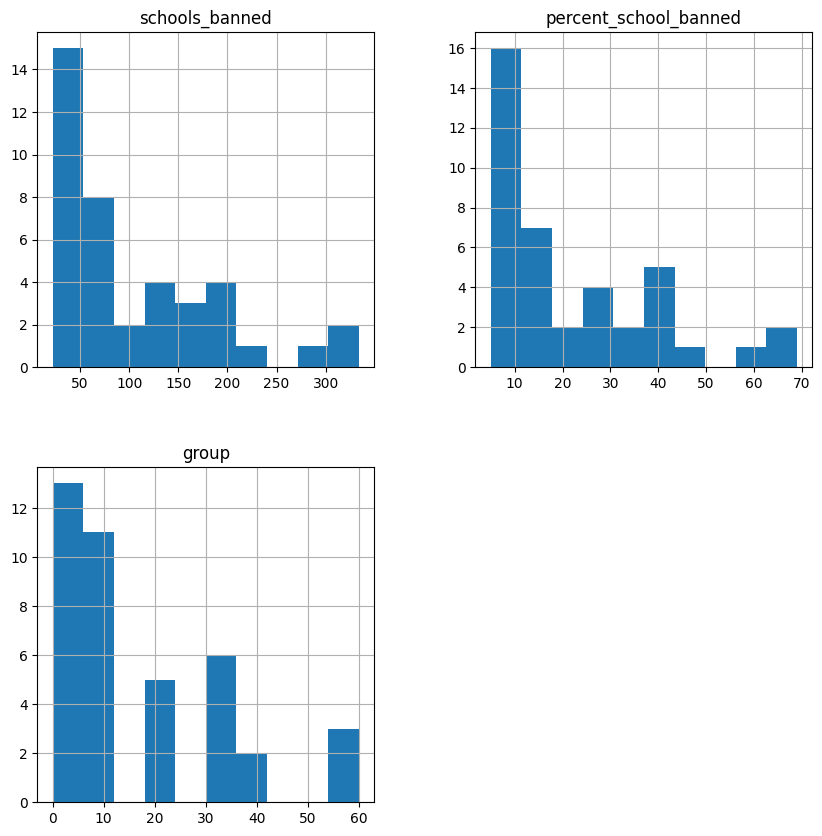

In [9]:
clothpercent_df.hist(figsize=(10,10))

In [10]:
clothpercent_df.describe(include = 'all')

,clothing_name,gender,reveal_body,schools_banned,percent_school_banned,group
count,40,40,40,40.000000,40.000000,40.000000
unique,40,3,2,NaN,NaN,NaN
top,short* shorts,f,y,NaN,NaN,NaN
freq,1,21,36,NaN,NaN,NaN
mean,NaN,NaN,NaN,104.150000,21.550000,16.250000
std,NaN,NaN,NaN,86.155956,17.887039,17.495421
min,NaN,NaN,NaN,22.000000,5.000000,0.000000
25%,NaN,NaN,NaN,31.750000,6.750000,0.000000
50%,NaN,NaN,NaN,72.000000,15.000000,10.000000
75%,NaN,NaN,NaN,163.750000,33.750000,30.000000


After inspecting both data sets, I can continue with exploring the data through visualizations. When I had chosen the topic of dress codes in school, I wanted to understand the relationship between restrictions and gender discrimination. 

The first question I can explore through this data is 'What is the gender distribution for all of the banned clothing items in the data frame?'

<Axes: title={'center': 'Gendered Distribution of Banned Items'}, ylabel='count'>

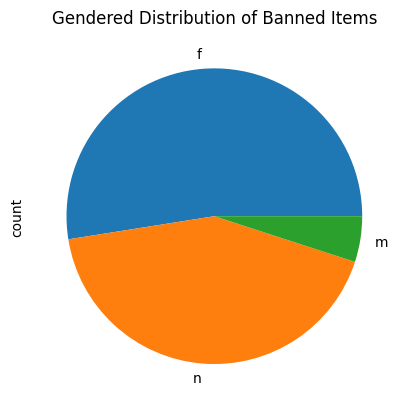

In [11]:
clothpercent_df['gender'].value_counts().plot(kind = 'pie', title = 'Gendered Distribution of Banned Items')

Using a pie chart, we can see that more than half of the banned items are items that are typically marketed towards girls (f) and the clothing banned that is specifically for boys (m) is only a small portion of the graph. 

Next, I wanted to see the distibution in type of clothing that is banned. 

In [12]:
clothtype = dressban_df["type"]

<Axes: title={'center': 'Categories of Banned Items'}, xlabel='type'>

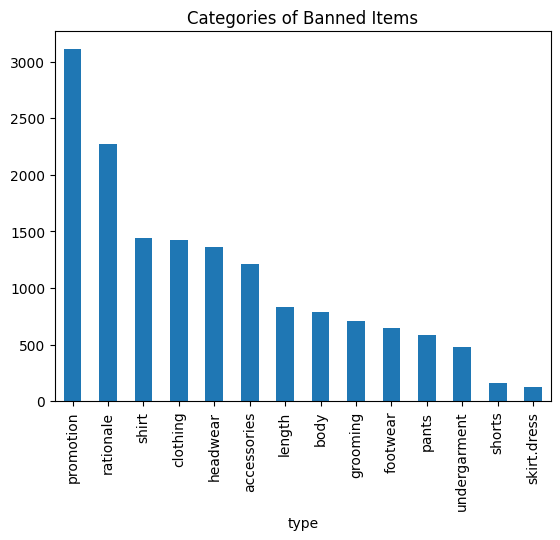

In [13]:
clothtype.value_counts().plot(kind = 'bar', title = 'Categories of Banned Items')

Often, dress codes are created to ban items that are considered 'revealing,' especially in restrictions toward female students. To explore further, I wanted to see what the distribution of banned items that are considered revealing versus not. 

<Axes: title={'center': 'Are "Revealing" Items Banned More Often?'}, ylabel='count'>

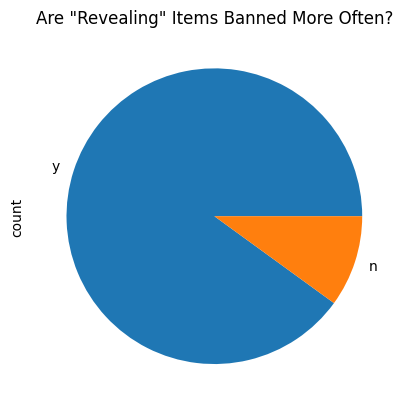

In [15]:
clothpercent_df['reveal_body'].value_counts().plot(kind = 'pie', title = 'Are "Revealing" Items Banned More Often?')

Based on the resulting pie graph, it seems that the vast majority of banned items are classified as revealing. 

This first exploration of the data already highlights several the reproduciton of gender roles and inequality reinforced through school dress codes. Through seeing the distribution of 'revealing' banned items, it shows that young girls are often sexualized through the clothing they wear and their bodies are sought ot be controlled thorugh these policies. Additionally, more than half of the banned items directly target girls clothing, while boys alone are policied only a small fraction of the time in these dress codes. 